In this code, I'll explore a dataframe with data collect by me from billboard US website with information about sellls from every album from Taylor Swift. 
The first thing is to load it from my machine here using panda

Pandas Version Used = 2.2.1 (https://pandas.pydata.org/docs/whatsnew/v2.2.1.html)
Openpyx1 Version Used = 3.1.2 (https://openpyxl.readthedocs.io/en/stable/changes.html)
Matplotlib Version = 3.8.3 (https://matplotlib.org/stable/users/getting_started/)
Source: https://www.billboard.com/lists/taylor-swift-first-week-sales-every-taylors-version/


In [67]:
import pandas as pd ## Command to import Pandas

#Importing the excel file to a dataframe called DF so I can start to do some EDA
df = pd.read_excel(r"C:\Users\vitor\OneDrive\Documentos\Taylor Swift Data\TaylorSwiftsells.xlsx")


Taylor Swift is a very famous singer and she has released until this day (March, 19th) fourteen albums - including her versions, which I'll explain more later about it. We can see every name, release date, amout of sells in the first week of the release, weeks in #1 and and weeks at the chart.

In [68]:
df ## simply calling the dataframe

,Album_Name,Release_Date,Amout_sells_1st_week,Weeks_#1,WeeksonChart
0,Taylor Swift,2006-11-11,40000,0,284
1,Fearless,2008-11-11,592000,11,261
2,Speak Now,2010-10-25,1047000,6,193
3,Red,2012-10-22,1208000,7,185
4,1989,2014-10-27,1287000,11,479
5,Reputation,2017-11-10,1216000,4,282
6,Lover,2019-08-23,867000,1,234
7,Folklore,2020-07-24,846000,8,186
8,Evermore,2020-12-11,329000,4,166
9,Fearless (Taylor's Version),2021-04-09,179000,2,136


Going deeply in the data, lets describe the dataframe

In [69]:
df.describe()



,Release_Date,Amout_sells_1st_week,Weeks_#1,WeeksonChart
count,14,1.400000e+01,14.000000,14.000000
mean,2017-08-08 12:00:00,7.847143e+05,4.928571,188.642857
min,2006-11-11 00:00:00,4.000000e+04,0.000000,16.000000
25%,2013-04-23 18:00:00,4.035000e+05,2.000000,122.500000
50%,2020-02-07 00:00:00,8.565000e+05,5.000000,185.500000
75%,2021-09-18 18:00:00,1.191000e+06,6.750000,254.250000
max,2023-10-27 00:00:00,1.359000e+06,11.000000,479.000000
std,NaN,4.445455e+05,3.561855,119.736639


With this description we can see:
- Count of 14 releases
- Average of 188.64 weeks on chart
- Average of 784714.3 sells on first weeks
- Max of 11 weeks in #1

Now, lets plot a timeline of their releases

In [70]:
import matplotlib.pyplot as plt 
import numpy as np


#Getting only the necessary collumns from the original Dataframe
albumname = df['Album_Name']
albumname

releasedate = df['Release_Date']
releasedate

#Creating a new dataframe
timelinedf = pd.DataFrame(data={"Release_Date": releasedate, "Album_name": albumname})
#Grating that the column release_date has the type of datetime
timelinedf["Release_Date"] = pd.to_datetime(timelinedf["Release_Date"])
#Creating also a third columnd with random numbers so with can be used as a level for the name of the album
timelinedf["Level"] = [np.random.randint(-6,-2) if (i%2) == 0 else np.random.randint(2,6) for i in range(len(timelinedf))]


#This is will be the dataframe used to plot the timeline
timelinedf

,Release_Date,Album_name,Level
0,2006-11-11,Taylor Swift,-3
1,2008-11-11,Fearless,2
2,2010-10-25,Speak Now,-4
3,2012-10-22,Red,3
4,2014-10-27,1989,-4
5,2017-11-10,Reputation,2
6,2019-08-23,Lover,-6
7,2020-07-24,Folklore,5
8,2020-12-11,Evermore,-3
9,2021-04-09,Fearless (Taylor's Version),2


Text(0.0, 1.0, 'Taylor Swift Release Studio Albums')

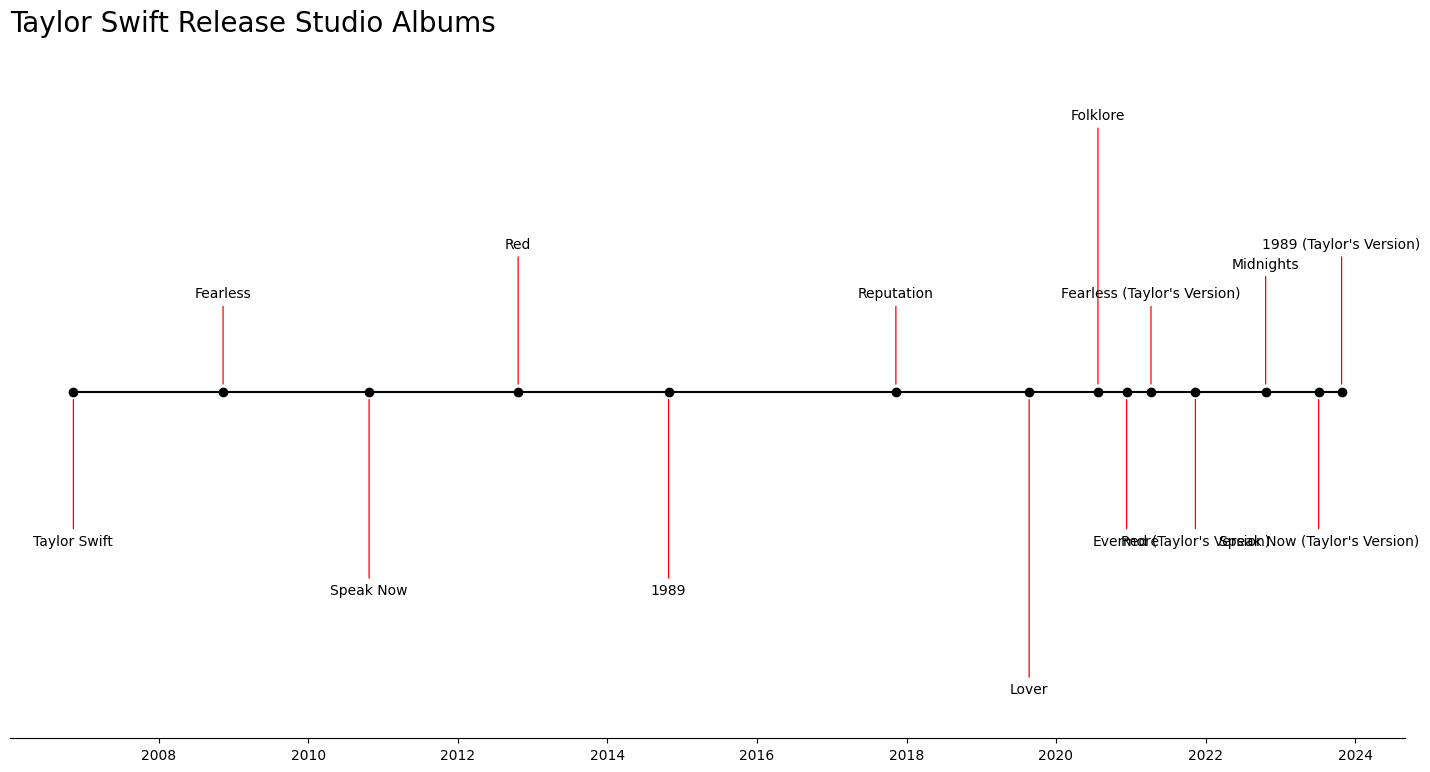

In [71]:
#Now it is time to print the timeline

#The background
fig, ax = plt.subplots(figsize=(18,9))

#The line in the middle
ax.plot(timelinedf.Release_Date, [0,]* len(timelinedf), "-o", color="black");

#defining some limits
ax.set_ylim(-7,7);

#creating the red lines to connect the album to the corresponding black dot
for indx in range(len(timelinedf)):
    date, album, level = timelinedf["Release_Date"][indx], timelinedf["Album_name"][indx], timelinedf["Level"][indx]
    if album == "Folklore" or album == "Midnights":
        ax.annotate(album, xy=(date, 0.1 if level>0 else -0.1),xytext=(date, level + 0.5),
            arrowprops=dict(arrowstyle="-",color="red", linewidth=0.9,),ha="center");
    else:
        ax.annotate(album, xy=(date, 0.1 if level>0 else -0.1),xytext=(date, level - 0.1),
            arrowprops=dict(arrowstyle="-",color="red", linewidth=0.9,),ha="center");

#removing the square around
ax.spines[["left","top","right"]].set_visible(False);
ax.yaxis.set_visible(False);

#Creating a title
ax.set_title("Taylor Swift Release Studio Albums", pad=10, loc="left", fontsize=20)



Another important fact about Taylor Swift is hers re-releases called taylor's versions. The reason of this is a situation between her and the old record company, which implies to have 100% of copyright of her 6 first albums, so every time she sings it lives, plays in TV, Radio, in Streaming services or in Music Videos, she will not receive a dollar. In that case, Taylor decided to re-record the first 6 albums changing the instrumentals a little, because lyrics she has the full rights and includs some "from the vault" songs recored during the time when the first album was released but the record company didn't allowed her to includ on the album. 

There was a difference between the sells from the original and the Taylor's Version? Take a look on the below dataframe.




In [73]:

#Creating a copy from the original dataframe
dftv = df.copy()

#Remove all the albums that contains the re-records and the original version
albumstoremove = ['Taylor Swift','Reputation','Lover', 'Folklore','Evermore','Midnights']
dftvfiltered = dftv.drop(dftv[dftv['Album_Name'].isin(albumstoremove)].index)

#Removing all the unecessary columns for this case
dftvfiltered.drop(['Release_Date', 'Weeks_#1', 'WeeksonChart'], axis=1)



,Album_Name,Amout_sells_1st_week
1,Fearless,592000
2,Speak Now,1047000
3,Red,1208000
4,1989,1287000
9,Fearless (Taylor's Version),179000
10,Red (Taylor's Version),369000
12,Speak Now (Taylor's Version),507000
13,1989 (Taylor's Version),1359000


Using the previous dataframe, we can plot a bar graph to compare each album in clusters:

TypeError: tuple indices must be integers or slices, not str

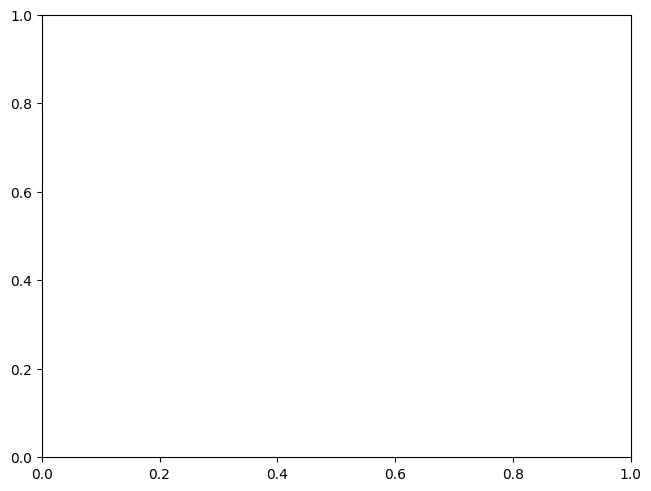

In [85]:
#defining the groups of the clusters
groups = ("FL","SN","RD","1989")

#defining the backgroup and the X
x = np.arange(len(groups))
bar_width = 0.30
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

plt.bar(x, groups['Amout_sells_1st_week'], bar_width, label='Original')



